<a href="https://colab.research.google.com/github/moinur25/House-Price-Data-cleaning-and-modeling/blob/main/house_price_data_cleaning_and_model_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-and-train-data/train.csv
/kaggle/input/test-and-train-data/test.csv


about dataset :

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

# Data Read and Manipulation

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df_train=pd.read_csv('/kaggle/input/test-and-train-data/train.csv')
df_test=pd.read_csv('/kaggle/input/test-and-train-data/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.info()
df_test.info()

print('train :',df_train.shape)
print('test:',df_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train=df_train.drop('Id', axis=1)
df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# **Deal with missing Value**

In [ ]:
df_train.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
df_test.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Create a Boolean mask indicating which cells are missing
missing_mask_train = df_train.isnull()

# Use the `any()` method to check which columns have at least one missing value
has_missing_train = missing_mask_train.any()

# Select the columns that have at least one missing value
cols_with_missing_train = df_train.columns[has_missing_train]

# Count the number of missing values in each selected column
missing_counts_train = df_train.loc[:, cols_with_missing_train].isnull().sum()
print(missing_counts_train)


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Create a Boolean mask indicating which cells are missing
missing_mask_test = df_test.isnull()

# Use the `any()` method to check which columns have at least one missing value
has_missing_test = missing_mask_test.any()

# Select the columns that have at least one missing value
cols_with_missing_test = df_test.columns[has_missing_test]

# Count the number of missing values in each selected column
missing_counts_test = df_test.loc[:, cols_with_missing_test].isnull().sum()
print(missing_counts_test)


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In the following variables, missing values mean the absence of the corresponding feature and do not mean missing data. Therefore, we change the NA values as follows:

In [ ]:
list(set(df_train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
list(set(df_test.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num_train= df_train.select_dtypes(include = ['float64', 'int64'])
df_num_train=pd.DataFrame(df_num_train)
df_num_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
df_num_test = df_test.select_dtypes(include = ['float64', 'int64'])
df_num_test=pd.DataFrame(df_num_test)
df_num_test.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [ ]:
df_num_train.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
df_num_test.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
# Replace null values with mean for continuous variable
mean_value =df_num_train['LotFrontage'].mean()
df_num_train['LotFrontage'].fillna(mean_value, inplace=True)

In [ ]:
mean_value =df_num_train['GarageYrBlt'].mean()
df_num_train['GarageYrBlt'].fillna(mean_value, inplace=True)

In [ ]:
mean_value =df_num_train['MasVnrArea'].mean()
df_num_train['MasVnrArea'].fillna(mean_value, inplace=True)

In [ ]:
df_num_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
for column in df_num_test.columns:
    if df_num_test[column].dtype == 'float64':  # Check if the column is numerical
        mean_value = df_num_test[column].mean() # Compute the mean
        df_num_test[column].fillna(mean_value, inplace=True)  # Replace null values with the mean

# Print the modified dataset
print(df_num_test)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0          1961          1961        

In [ ]:
df_num_test.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [ ]:
df_str_train = df_train.select_dtypes(include = ['O'])
df_str_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df_str_test = df_test.select_dtypes(include = ['O'])
df_str_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df_str_train.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
df_str_test.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [ ]:
# Replace null values with mode in categorical variables
for column in df_str_train.columns:
    if df_str_train[column].dtype == 'object':  # Check if the column is categorical
        mode_value_train = df_str_train[column].mode()[0]  # Compute the mode
        df_str_train[column].fillna(mode_value_train, inplace=True)  # Replace null values with the mode

# Print the modified dataset
print(df_str_train)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [ ]:
for column in df_str_test.columns:
    if df_str_test[column].dtype == 'object':  # Check if the column is categorical
        mode_value_test = df_str_test[column].mode()[0]  # Compute the mode
        df_str_test[column].fillna(mode_value_train, inplace=True)  # Replace null values with the mode

# Print the modified dataset
print(df_str_test)

     MSZoning Street   Alley LotShape LandContour Utilities LotConfig  \
0          RH   Pave  Normal      Reg         Lvl    AllPub    Inside   
1          RL   Pave  Normal      IR1         Lvl    AllPub    Corner   
2          RL   Pave  Normal      IR1         Lvl    AllPub    Inside   
3          RL   Pave  Normal      IR1         Lvl    AllPub    Inside   
4          RL   Pave  Normal      IR1         HLS    AllPub    Inside   
...       ...    ...     ...      ...         ...       ...       ...   
1454       RM   Pave  Normal      Reg         Lvl    AllPub    Inside   
1455       RM   Pave  Normal      Reg         Lvl    AllPub    Inside   
1456       RL   Pave  Normal      Reg         Lvl    AllPub    Inside   
1457       RL   Pave  Normal      Reg         Lvl    AllPub    Inside   
1458       RL   Pave  Normal      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
0          Gtl        NAmes      Feedr  ...     Attc

In [ ]:
df_str_train.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
df_str_test.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
train_data=pd.concat([df_num_train,df_str_train],axis=1)
train_data=pd.DataFrame(train_data)
train_data = train_data.astype({'BsmtFinSF1': 'int64', 'BsmtFinSF2': 'int64', 'BsmtUnfSF': 'int64', 'TotalBsmtSF': 'int64'\
                              , 'BsmtFullBath': 'int64', 'BsmtHalfBath': 'int64', 'GarageCars': 'int64', 'GarageArea': 'int64'})
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [ ]:
test_data=pd.concat([df_num_test,df_str_test],axis=1)
test_data=pd.DataFrame(test_data)
test_data = test_data.astype({'BsmtFinSF1': 'int64', 'BsmtFinSF2': 'int64', 'BsmtUnfSF': 'int64', 'TotalBsmtSF': 'int64'\
                              , 'BsmtFullBath': 'int64', 'BsmtHalfBath': 'int64', 'GarageCars': 'int64', 'GarageArea': 'int64'})
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468,...,Attchd,Unf,TA,TA,Y,Normal,MnPrv,Normal,WD,Normal
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923,...,Attchd,Unf,TA,TA,Y,Normal,Normal,Gar2,WD,Normal
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791,...,Attchd,Fin,TA,TA,Y,Normal,MnPrv,Normal,WD,Normal
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602,...,Attchd,Fin,TA,TA,Y,Normal,Normal,Normal,WD,Normal
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263,...,Attchd,RFn,TA,TA,Y,Normal,Normal,Normal,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0,...,Normal,Normal,Normal,Normal,Y,Normal,Normal,Normal,WD,Normal
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252,...,CarPort,Unf,TA,TA,Y,Normal,Normal,Normal,WD,Abnorml
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224,...,Detchd,Unf,TA,TA,Y,Normal,Normal,Normal,WD,Abnorml
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337,...,Normal,Normal,Normal,Normal,Y,Normal,MnPrv,Shed,WD,Normal


# **Feature selection**

In [ ]:
train_data.corr()

/tmp/ipykernel_32/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


/tmp/ipykernel_32/4067861223.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train_data.corr()


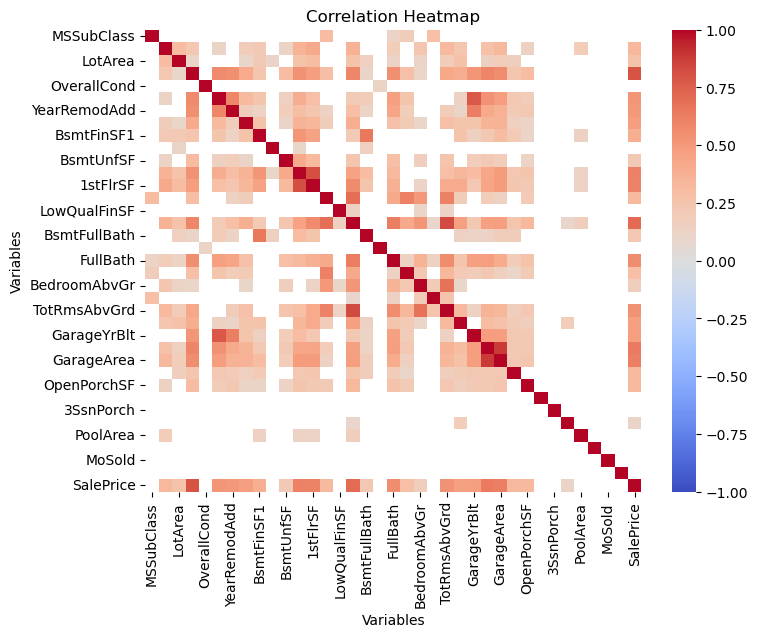

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=train_data.corr()
mask=corr_matrix>0.1
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,mask=~mask)
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [ ]:
features=['LotArea','BsmtFinSF1','OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd',
   'MasVnrArea']


**Distribution plot**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_32/281058148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


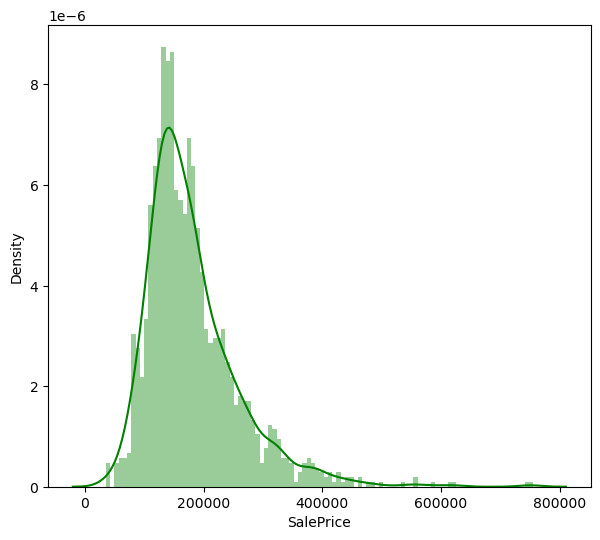

In [ ]:
print(train_data['SalePrice'].describe())
plt.figure(figsize=(7, 6))
sns.distplot(train_data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Outliers Detection and remove


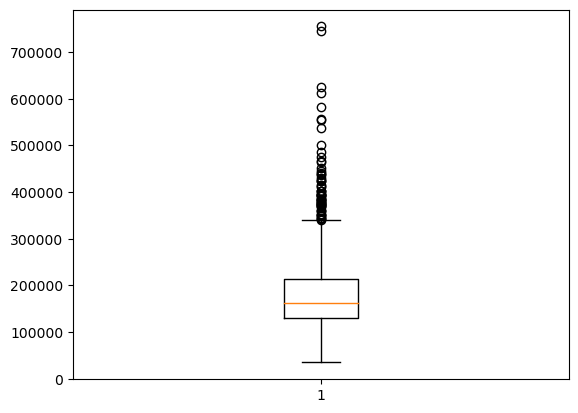

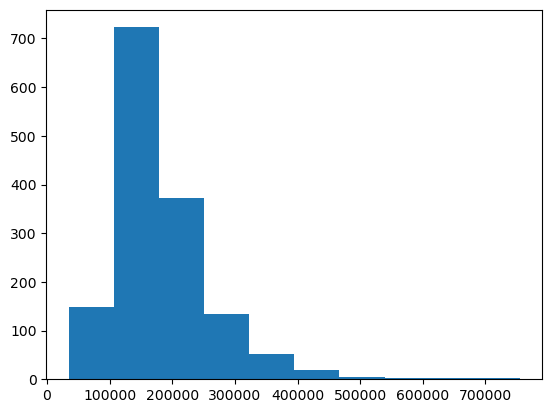

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


'(another way to detect outlier)\n# Remove the outliers from the DataFrame\ndata_without_outliers = train_data[~outlier_indices]\ndata_without_outliers\n# Calculate the interquartile range (IQR)\nQ1 = variable.quantile(0.25)\nQ3 = variable.quantile(0.75)\nIQR = Q3 - Q1\n\n# Define a multiplier to determine outliers\nmultiplier = 1.5\n\n# Identify the indices of the outlier data points based on the IQR\ncolumn_outlier_indices = (variable < (Q1 - multiplier * IQR)) | (variable > (Q3 + multiplier * IQR))\ntrain_data = train_data[~outlier_indices]\noutlier_indices.extend(column_outlier_indices)'

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
outlier_indices=[]
threshold = 3
variable=train_data['SalePrice']
z_scores=stats.zscore(variable)
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)
# Create a box plot to visualize outliers
plt.boxplot(variable)
plt.show()
plt.hist(variable)
plt.show()
print(outlier_indices)
# Remove outliers by replacing them with NaN
train_data[outlier_indices] = np.nan

# Drop rows containing NaN values
train_data.dropna(inplace=True)
'''(another way to detect outlier)
# Remove the outliers from the DataFrame
data_without_outliers = train_data[~outlier_indices]
data_without_outliers
# Calculate the interquartile range (IQR)
Q1 = variable.quantile(0.25)
Q3 = variable.quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier to determine outliers
multiplier = 1.5

# Identify the indices of the outlier data points based on the IQR
column_outlier_indices = (variable < (Q1 - multiplier * IQR)) | (variable > (Q3 + multiplier * IQR))
train_data = train_data[~outlier_indices]
outlier_indices.extend(column_outlier_indices)'''

In [ ]:
'''import pandas as pd
import numpy as np
# Define a function to detect outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the outlier detection function to each numerical column in your DataFrame
outliers = train_data.select_dtypes(include=[np.number]).apply(detect_outliers_zscore)
# Remove outliers by replacing them with NaN
train_data[outliers] = np.nan

# Drop rows containing NaN values
train_data.dropna(inplace=True)'''

'import pandas as pd\nimport numpy as np\n# Define a function to detect outliers using the Z-score method\ndef detect_outliers_zscore(data, threshold=3):\n    z_scores = np.abs((data - data.mean()) / data.std())\n    return z_scores > threshold\n\n# Apply the outlier detection function to each numerical column in your DataFrame\noutliers = train_data.select_dtypes(include=[np.number]).apply(detect_outliers_zscore)\n# Remove outliers by replacing them with NaN\ntrain_data[outliers] = np.nan\n\n# Drop rows containing NaN values\ntrain_data.dropna(inplace=True)'

In [ ]:
train_data.shape

(1438, 80)

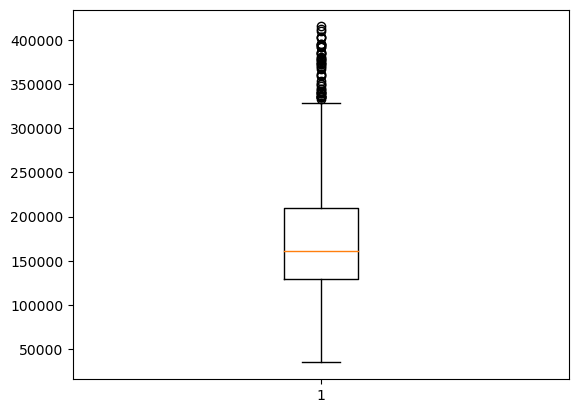

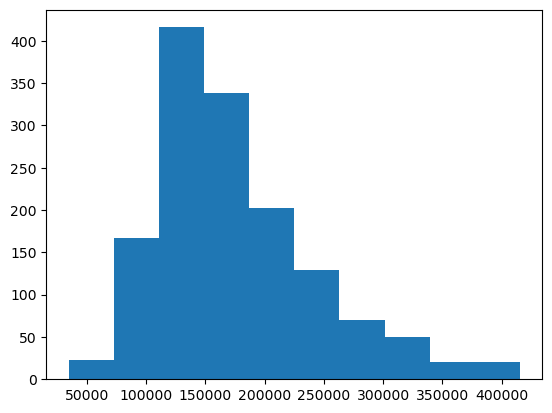

In [ ]:
#After deleted the outliers from SalePrice variable
plt.boxplot(train_data['SalePrice'])
plt.show()
plt.hist(train_data['SalePrice'])
plt.show()

# Model selection and prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X=train_data[features]
X1=test_data[features]
Y=train_data['SalePrice']

**linear Regression**

In [ ]:
model=LinearRegression()
model=model.fit(X,Y)

In [ ]:
print('coefficient:',model.coef_)
print("Intercept:", model.intercept_)

coefficient: [ 6.12988175e-01  1.41439032e+01  1.89545607e+04  3.28791880e+01
  5.26075070e+00  1.05860748e+01 -3.01336915e+03  1.23810814e+03
  1.21103553e+04  5.05052934e+00  2.28208429e+02  3.70162311e+02
  1.51147205e+01]
Intercept: -1230878.8902701854


In [ ]:
y_pred=model.predict(X1)
y_pred=y_pred[0:1438]
y_pred


array([113601.7013926 , 160749.37056835, 175198.9257468 , ...,
       254515.72473762, 200165.59733432, 186331.97064114])

In [ ]:
print(len(y_pred))
print(len(Y))

1438
1438


In [ ]:
mse = mean_squared_error(Y, y_pred)
rmse = mean_squared_error(Y, y_pred, squared=False)
r2 = r2_score(Y, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 8557181915.176827
Root Mean Squared Error: 92505.03724217849
R^2 Score: -0.8807713902696164


R-squared (R^2) Score: The R^2 Score obtained is -0.8836955146476582. The R^2 Score represents the proportion of the variance in the target variable (Y) that can be explained by the linear regression model. It ranges from -∞ to 1, with higher values indicating a better fit of the model to the data. However, a negative R^2 Score suggests that the model is performing worse than a model that simply predicts the mean of the target variable. In this case, the model may not capture the underlying patterns in the data or may be overfitting.

Based on these results, it appears that the linear regression model evaluated may not be well-suited for the given data or may require further adjustments. It is recommended to investigate the data, check for any issues such as outliers or missing values, and consider alternative modeling approaches or feature engineering techniques to improve the model's performance.

**Ridge Regression**

In [ ]:
alpha = 1.0  # Regularization parameter (you can adjust this)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X,Y)

Ridge()

In [ ]:
print("Coefficient:", ridge_model.coef_)
print("intercept:", ridge_model.intercept_)

Coefficient: [ 6.12919805e-01  1.41375183e+01  1.89384838e+04  3.28910281e+01
  5.27112973e+00  1.05786905e+01 -2.99028940e+03  1.23715065e+03
  1.20359206e+04  5.27061656e+00  2.28512092e+02  3.70394917e+02
  1.51291362e+01]
intercept: -1231861.9716005614


In [ ]:
y_pred = ridge_model.predict(X1)
y_pred=y_pred[0:1438]
y_pred

array([113703.74434591, 160745.81362001, 175220.31949866, ...,
       254503.30351741, 200183.18609919, 186360.56880029])

In [ ]:
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
print("Mean Squared Error:", mse)
print(r2)

Mean Squared Error: 8556250785.042397
-0.8805667384420857
